In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving combination_assets.xlsx to combination_assets.xlsx


In [2]:
import io
df = pd.read_excel(io.BytesIO(uploaded['combination_assets.xlsx']),index_col='Date')

In [3]:
df.tail()

,SENSEX,Adaniports,Asianpaints,Axisbank,Bajajauto,Bhartiartl,Coalindia,Drreddy,HDFC,HDFCBank,Heromotors,ICICIBank,INDUSINDBK,INFY,ITC,KOTAKBank,L&T,M&M,Maruti,NTPC,ONGC,Reliance,SBIN,Sunpharma,TATAMotors,TATAMotors(D),TATASteel,TCS,Wipro,YesBank
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-08,34370.57813,343.299988,1634.250000,430.250000,2801.050049,585.150024,146.699997,3967.600098,1760.800049,1015.900024,2384.300049,359.799988,451.600006,720.849976,197.649994,1336.750000,961.349976,470.850006,5734.799805,98.550003,90.949997,1569.500000,186.800003,489.000000,115.449997,48.049999,333.600006,2071.750000,226.449997,30.600000
2020-06-09,33956.69141,346.049988,1642.050049,420.049988,2791.149902,567.799988,144.300003,4123.799805,1772.099976,987.299988,2387.300049,348.549988,463.899994,717.599976,198.500000,1304.150024,953.299988,478.750000,5662.299805,98.000000,90.000000,1537.150024,184.449997,500.750000,111.449997,46.650002,332.200012,2072.050049,218.350006,29.850000
2020-06-10,34247.05078,346.549988,1635.949951,427.450012,2717.199951,567.099976,140.699997,4112.500000,1809.300049,991.849976,2292.250000,353.000000,499.600006,715.849976,199.050003,1332.250000,946.549988,472.049988,5675.600098,98.150002,88.250000,1572.150024,187.699997,499.149994,111.400002,47.000000,324.000000,2108.750000,217.000000,30.400000
2020-06-11,33538.37109,338.649994,1610.599976,413.450012,2718.550049,551.849976,137.699997,4057.600098,1787.449951,968.599976,2309.949951,341.250000,523.150024,703.950012,194.250000,1298.699951,930.450012,474.549988,5426.149902,98.050003,86.900002,1537.699951,177.149994,473.649994,106.150002,45.099998,313.149994,2067.649902,212.899994,29.799999
2020-06-12,33780.89063,345.299988,1637.349976,408.000000,2782.149902,560.099976,134.649994,4007.949951,1792.199951,982.750000,2401.850098,344.200012,528.450012,692.049988,193.899994,1279.800049,926.400024,508.450012,5561.750000,96.900002,83.900002,1588.800049,179.149994,480.100006,105.300003,44.700001,317.600006,2039.500000,207.899994,29.500000


In [4]:
df1 = df.drop('SENSEX',axis=1)

In [5]:
df1 = df1.dropna()
df1.shape

(1228, 29)

In [6]:
stocks1 = df1.tail(245)
stocks1.tail()

,Adaniports,Asianpaints,Axisbank,Bajajauto,Bhartiartl,Coalindia,Drreddy,HDFC,HDFCBank,Heromotors,ICICIBank,INDUSINDBK,INFY,ITC,KOTAKBank,L&T,M&M,Maruti,NTPC,ONGC,Reliance,SBIN,Sunpharma,TATAMotors,TATAMotors(D),TATASteel,TCS,Wipro,YesBank
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-08,343.299988,1634.250000,430.250000,2801.050049,585.150024,146.699997,3967.600098,1760.800049,1015.900024,2384.300049,359.799988,451.600006,720.849976,197.649994,1336.750000,961.349976,470.850006,5734.799805,98.550003,90.949997,1569.500000,186.800003,489.000000,115.449997,48.049999,333.600006,2071.750000,226.449997,30.600000
2020-06-09,346.049988,1642.050049,420.049988,2791.149902,567.799988,144.300003,4123.799805,1772.099976,987.299988,2387.300049,348.549988,463.899994,717.599976,198.500000,1304.150024,953.299988,478.750000,5662.299805,98.000000,90.000000,1537.150024,184.449997,500.750000,111.449997,46.650002,332.200012,2072.050049,218.350006,29.850000
2020-06-10,346.549988,1635.949951,427.450012,2717.199951,567.099976,140.699997,4112.500000,1809.300049,991.849976,2292.250000,353.000000,499.600006,715.849976,199.050003,1332.250000,946.549988,472.049988,5675.600098,98.150002,88.250000,1572.150024,187.699997,499.149994,111.400002,47.000000,324.000000,2108.750000,217.000000,30.400000
2020-06-11,338.649994,1610.599976,413.450012,2718.550049,551.849976,137.699997,4057.600098,1787.449951,968.599976,2309.949951,341.250000,523.150024,703.950012,194.250000,1298.699951,930.450012,474.549988,5426.149902,98.050003,86.900002,1537.699951,177.149994,473.649994,106.150002,45.099998,313.149994,2067.649902,212.899994,29.799999
2020-06-12,345.299988,1637.349976,408.000000,2782.149902,560.099976,134.649994,4007.949951,1792.199951,982.750000,2401.850098,344.200012,528.450012,692.049988,193.899994,1279.800049,926.400024,508.450012,5561.750000,96.900002,83.900002,1588.800049,179.149994,480.100006,105.300003,44.700001,317.600006,2039.500000,207.899994,29.500000


In [7]:
stocks1_ret = stocks1.pct_change()
stocks1_ret.head()

,Adaniports,Asianpaints,Axisbank,Bajajauto,Bhartiartl,Coalindia,Drreddy,HDFC,HDFCBank,Heromotors,ICICIBank,INDUSINDBK,INFY,ITC,KOTAKBank,L&T,M&M,Maruti,NTPC,ONGC,Reliance,SBIN,Sunpharma,TATAMotors,TATAMotors(D),TATASteel,TCS,Wipro,YesBank
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-13,0.000000,0.008217,0.008113,-0.007421,0.010697,-0.005447,-0.000560,0.007127,0.007268,-0.008413,0.003828,-0.051597,-0.000874,0.002322,0.013819,0.005499,0.013999,-0.009822,0.003720,-0.011121,-0.003678,0.007267,-0.004216,-0.009760,-0.001803,-0.006524,-0.003008,0.001342,-0.130983
2019-06-14,0.003412,-0.011683,-0.023106,-0.017142,-0.028729,-0.001761,-0.008925,-0.005301,-0.003927,-0.012865,-0.004409,-0.041676,-0.002962,-0.009088,-0.020047,0.005766,-0.005928,-0.005498,-0.015938,0.002072,-0.007308,-0.007792,0.007184,-0.019116,-0.029500,-0.001492,0.000177,0.001341,-0.017506
2019-06-17,-0.008325,-0.007645,-0.029331,-0.012654,-0.026323,0.000588,-0.004288,-0.005879,-0.005380,-0.008257,-0.008498,-0.019029,0.000135,-0.010969,-0.009160,-0.018050,-0.019145,-0.024565,-0.003766,-0.028943,-0.026754,-0.017307,-0.024583,-0.033191,-0.029156,-0.057194,-0.002351,0.001171,0.009561
2019-06-18,-0.003429,-0.015621,-0.002507,0.006840,0.003343,0.019781,0.014525,-0.009204,-0.001965,0.007382,0.019194,0.006680,0.012963,0.000364,0.001027,0.004370,0.001360,-0.021674,0.001134,0.010645,-0.001014,0.006512,-0.011622,-0.002835,-0.019169,-0.001691,0.000734,-0.003844,-0.058975


In [8]:
stocks1_ret.dropna(how='any',inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


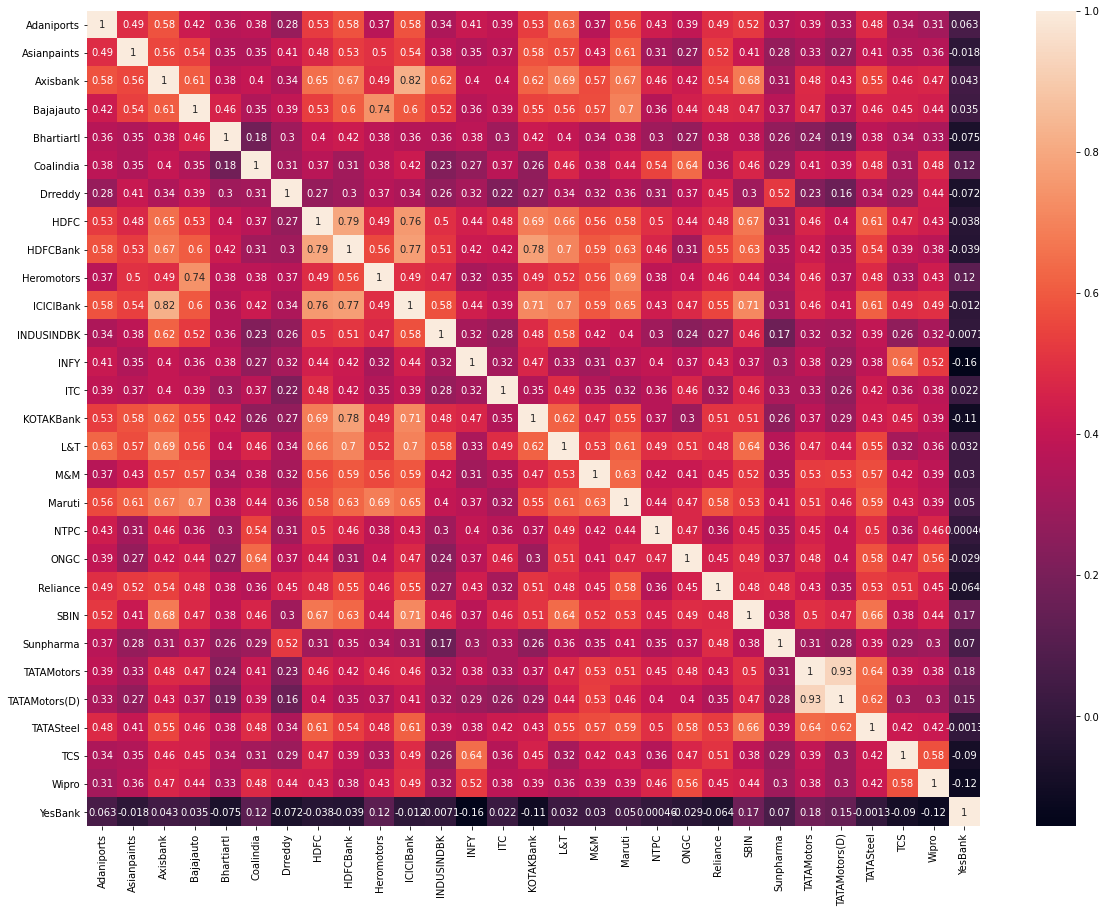

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(stocks1_ret.corr(),annot=True)

Here we can see some stocks are strongly correlated

To minimize this correlation we can use grouping method ie k-means clustering

# Clustering

Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics. Investors will use cluster analysis to develop a cluster trading approach that helps them build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

### Key points how clustering helps in stock selection
1. Cluster analysis helps investors develop a cluster trading approach that builds a diversified portfolio of investments.

2. Cluster analysis enables investors to buy and cluster assets with related returns that fit different market segments.

3. One of the benefits of cluster analysis is to help protect the investor's portfolio against systemic risks that could make the portfolio vulnerable to losses.

4. One criticism of cluster analysis is that clusters with a high correlation in returns sometimes share similar risk factors, meaning that weak performance in one cluster could translate to weak performance in another.


In [12]:
returns = stocks1_ret.mean() * 245
variance = stocks1_ret.std() * np.sqrt(245)
returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single stocks1_ret-frame
ret_var = pd.concat([returns, variance], axis = 1)
ret_var.columns = ["Returns","Variance"]

In [13]:
ret_var

,Returns,Variance
Adaniports,-0.106848,0.419312
Asianpaints,0.206431,0.333280
Axisbank,-0.512868,0.585630
Bajajauto,0.077149,0.367521
Bhartiartl,0.542194,0.444964
Coalindia,-0.486364,0.388933
Drreddy,0.496866,0.321735
HDFC,-0.075529,0.459983
HDFCBank,-0.127651,0.388436
Heromotors,0.027216,0.452961


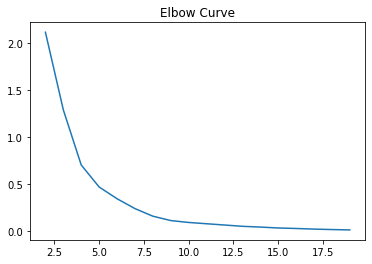

In [14]:
from sklearn.cluster import KMeans
X =  ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,20):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,20), sse)
plt.title("Elbow Curve")
plt.show()

Here we can see at 8 we can see elbow. So we will try to make total of 8 groups

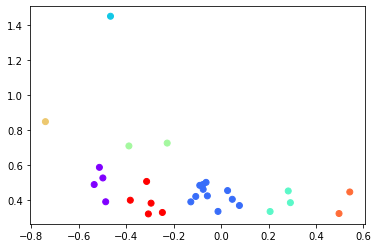

In [15]:
kmeans = KMeans(n_clusters = 8).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

We dont need the upper blue and the red stock as the blue representing stocks has highest variance and the red is having lowest returns.

In [16]:
ret_var.drop(["YesBank",'INDUSINDBK'], inplace =True)

Now we again build clusters without YesBank and INDUSINDBK

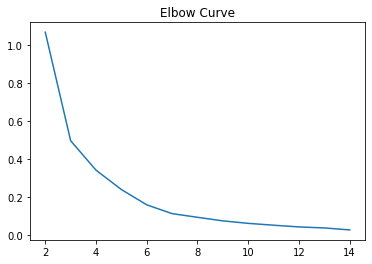

In [17]:
X =  ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

Here we see elbow at 7. So grouping then into 7

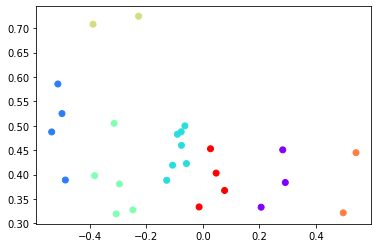

In [18]:
kmeans = KMeans(n_clusters = 7).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [19]:
Company = pd.DataFrame(ret_var.index,columns=['stocks'])
cluster_labels = pd.DataFrame(kmeans.labels_,columns=['cluster'])
cluster_df = pd.concat([Company, cluster_labels],axis = 1)
cluster_df

,stocks,cluster
0,Adaniports,2
1,Asianpaints,0
2,Axisbank,1
3,Bajajauto,6
4,Bhartiartl,5
5,Coalindia,1
6,Drreddy,5
7,HDFC,2
8,HDFCBank,2
9,Heromotors,6


We have grouped them now we will sort them by their respective groups and returns 

In [20]:
cluster_df['Returns'] = ret_var['Returns'].values
cluster_df['Variance'] = ret_var['Variance'].values

In [21]:
cluster_df.sort_values(by = ['cluster','Returns'])

,stocks,cluster,Returns,Variance
1,Asianpaints,0,0.206431,0.333280
19,Reliance,0,0.282847,0.450723
21,Sunpharma,0,0.291922,0.383850
20,SBIN,1,-0.534840,0.487404
2,Axisbank,1,-0.512868,0.585630
18,ONGC,1,-0.498247,0.525059
5,Coalindia,1,-0.486364,0.388933
8,HDFCBank,2,-0.127651,0.388436
0,Adaniports,2,-0.106848,0.419312
15,M&M,2,-0.089992,0.482676


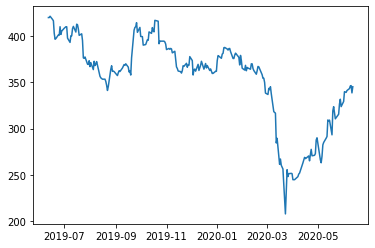

Adaniports


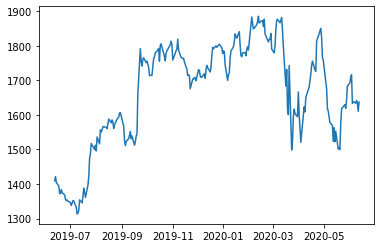

Asianpaints


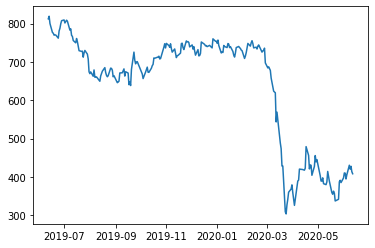

Axisbank


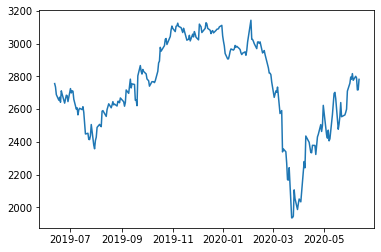

Bajajauto


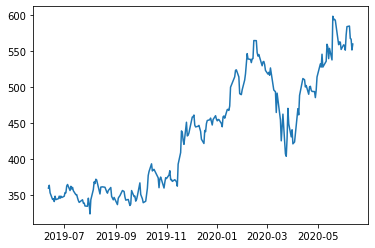

Bhartiartl


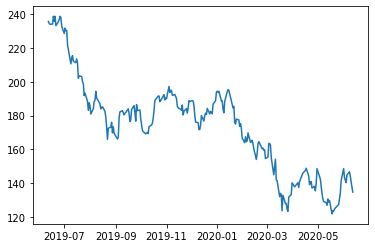

Coalindia


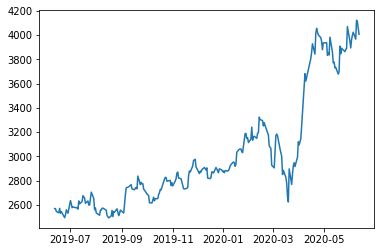

Drreddy


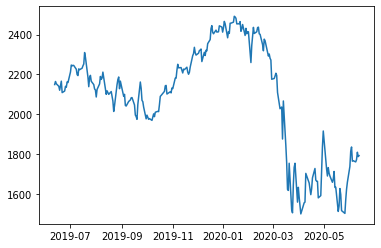

HDFC


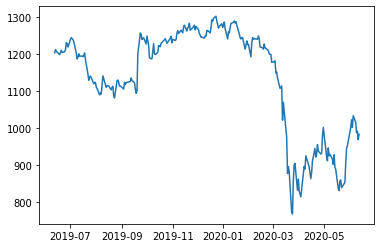

HDFCBank


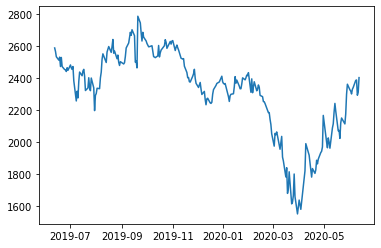

Heromotors


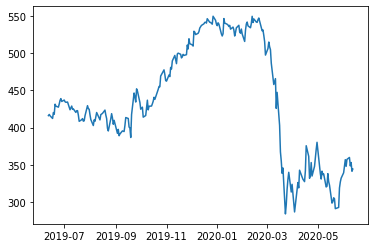

ICICIBank


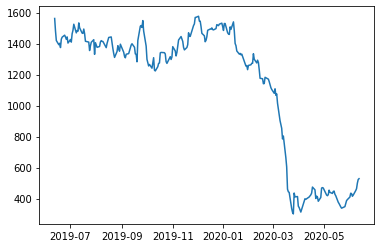

INDUSINDBK


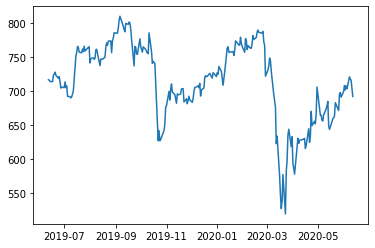

INFY


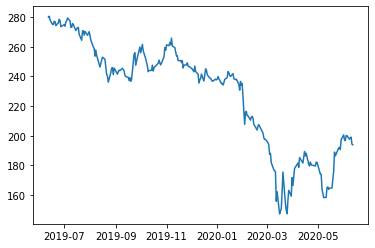

ITC


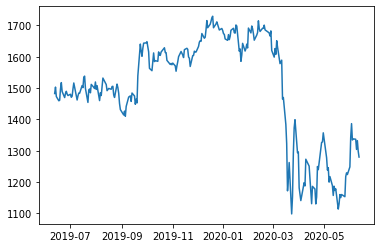

KOTAKBank


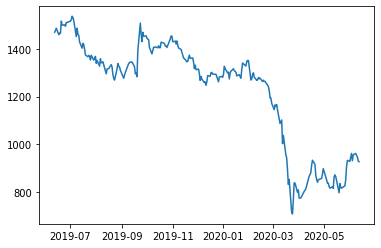

L&T


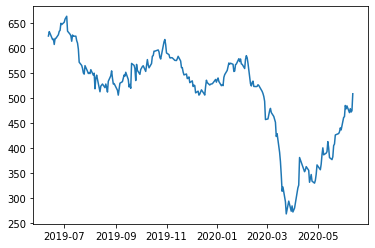

M&M


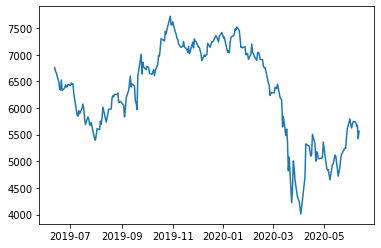

Maruti


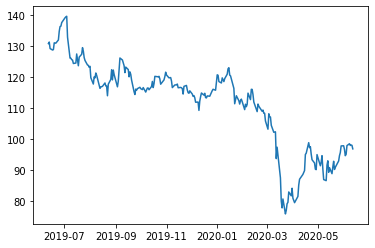

NTPC


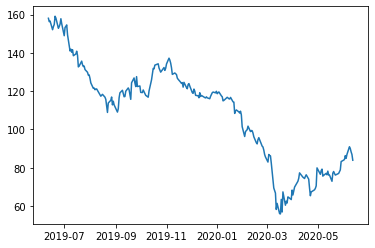

ONGC


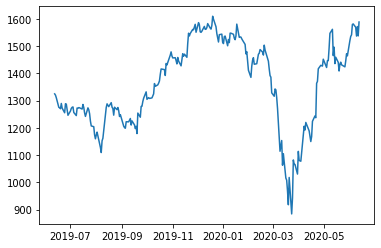

Reliance


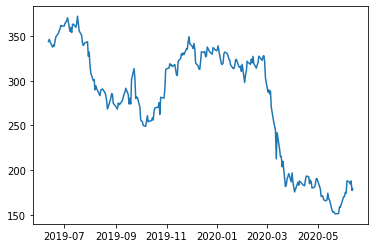

SBIN


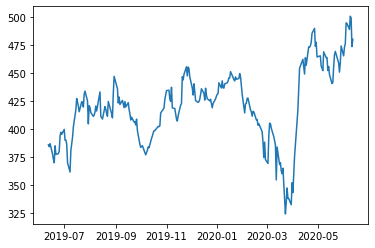

Sunpharma


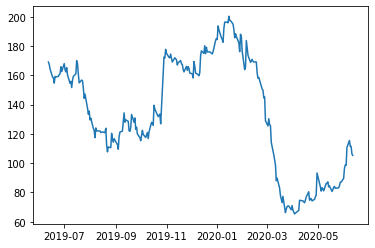

TATAMotors


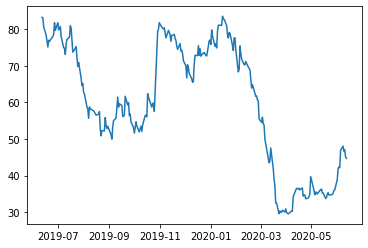

TATAMotors(D)


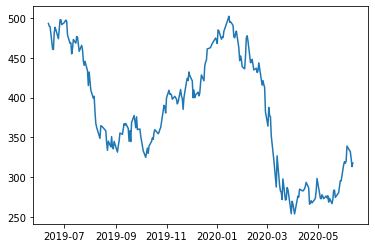

TATASteel


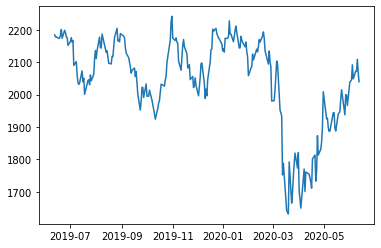

TCS


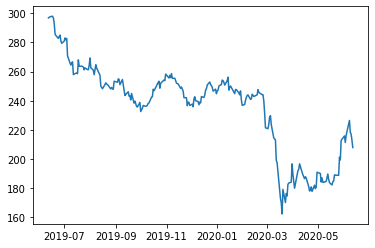

Wipro


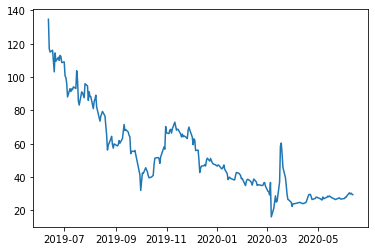

YesBank


In [22]:
for i in stocks1:
    plt.plot(stocks1[i])
    plt.show()
    print(i)
    #Stocks that can be considered for making a portfolio
    #Adaniports , Bajajauto , Bhartiartl , Drreddy , HDFCBank , Heromotors , INFY , M&M , ONGC , Reliance , TCS
    #From these stocks according to their groups and returns we can shortlist following stocks
    #

In [23]:
Portfolio = df1[['Adaniports' , 'Bajajauto' , 'Bhartiartl' , 'Drreddy' , 'ONGC' , 'Reliance' , 'M&M']]

In [24]:
Portfolio.head()

,Adaniports,Bajajauto,Bhartiartl,Drreddy,ONGC,Reliance,M&M
Date,,,,,,,
2015-06-15,302.589355,2007.138306,367.038086,3159.029785,157.204514,433.384460,570.726257
2015-06-16,305.663574,2057.696045,367.615021,3126.683838,157.463654,434.441772,576.642517
2015-06-17,303.516510,2041.259399,374.714142,3184.334961,158.265060,447.538269,586.277039
2015-06-18,303.516510,2061.912842,378.396057,3213.113037,161.808182,470.487091,586.464172
2015-06-19,297.270538,2072.024902,385.095093,3220.057861,165.066574,478.993805,610.597168


In [46]:
Portfolio.shape

(1228, 7)

In [25]:
Port_ret = Portfolio.pct_change()
Port_ret.dropna(how = 'any' , inplace = True)
Port_ret.head()

,Adaniports,Bajajauto,Bhartiartl,Drreddy,ONGC,Reliance,M&M
Date,,,,,,,
2015-06-16,0.010160,0.025189,0.001572,-0.010239,0.001648,0.002440,0.010366
2015-06-17,-0.007024,-0.007988,0.019311,0.018438,0.005089,0.030146,0.016708
2015-06-18,0.000000,0.010118,0.009826,0.009037,0.022387,0.051278,0.000319
2015-06-19,-0.020579,0.004904,0.017704,0.002161,0.020137,0.018081,0.041150
2015-06-22,0.021175,0.007185,-0.021888,0.012158,-0.002350,-0.004967,0.004940


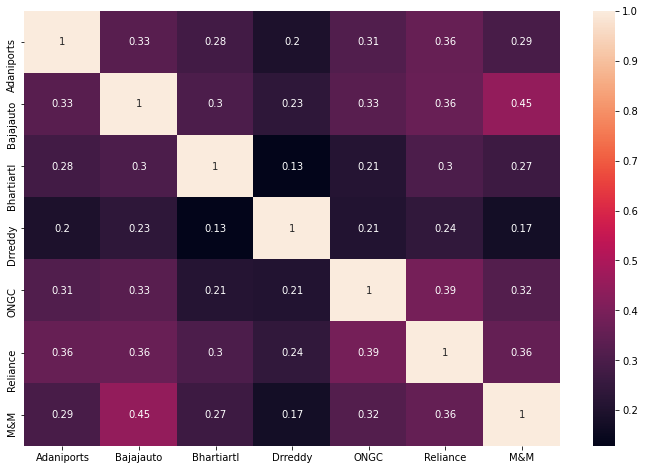

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(Port_ret.corr(),annot=True)

We have reduced the correlation using K-means clustering method. The correlations are less than 0.4 due to diversification

In [34]:
# no of days considered here in a year
q1_ret = Port_ret.mean() * 245
q1_cov = Port_ret.cov() * 245

In [35]:
pf_ret , pf_vol , pf_sharpe_ratio , pf_coin_weight = ([] for i in range(4))
num_portfolios = 50000
for portfolio in range (num_portfolios):
    weights = np.random.random(7)
    weights = weights/np.sum(weights)
    returns = np.dot(weights,q1_ret)
    volatility = np.sqrt(np.dot(weights.T , np.dot(q1_cov , weights)))
    sharpe = returns/volatility
    pf_coin_weight.append(weights)
    pf_ret.append(returns)
    pf_vol.append(volatility)
    pf_sharpe_ratio.append(sharpe)

In [36]:
print('Max sharpe ratio: ', max(pf_sharpe_ratio))
print('Its location in the array: ', pf_sharpe_ratio.index(max(pf_sharpe_ratio)))

Max sharpe ratio:  0.9346848556958319
Its location in the array:  30632


So the best portfolio is on index 30632. Let’s check the allocation weights in that index number and save the return and volatility figures to use it in the chart later

In [37]:
pf_coin_weight = pd.DataFrame(pf_coin_weight)

#get all the weights given to the stocks
print(pf_coin_weight.iloc[30632,:])

max_sr_ret = pf_ret[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]
max_sr_vol = pf_vol[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]

0    0.069782
1    0.116884
2    0.177520
3    0.145723
4    0.002996
5    0.474007
6    0.013088
Name: 30632, dtype: float64


In [38]:
print('Max returns for this portfolio: ', max_sr_ret)
print('Max volatility for this portfolio: ', max_sr_vol)

Max returns for this portfolio:  0.20042786806708618
Max volatility for this portfolio:  0.2144336316628094


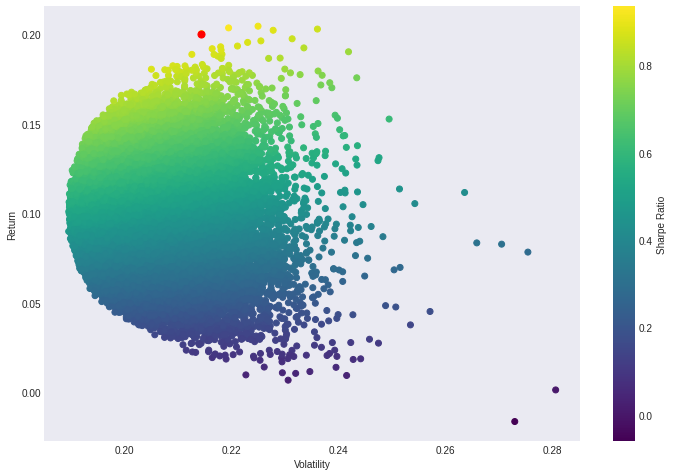

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.scatter(pf_vol, pf_ret, c=pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50)

plt.show()

## Taking 1 year data and optimizing it usind andom asset allocation

In [47]:
#Taking data for 1 year
Port_ret1 = Port_ret.tail(245)

In [48]:
q1_ret = Port_ret1.mean() * 245
q1_cov = Port_ret1.cov() * 245

In [55]:
pf_ret , pf_vol , pf_sharpe_ratio , pf_coin_weight = ([] for i in range(4))
num_portfolios = 50000
for portfolio in range (num_portfolios):
    weights = np.random.random(7)
    weights = weights/np.sum(weights)
    returns = np.dot(weights,q1_ret)
    volatility = np.sqrt(np.dot(weights.T , np.dot(q1_cov , weights)))
    sharpe = returns/volatility
    pf_coin_weight.append(weights)
    pf_ret.append(returns)
    pf_vol.append(volatility)
    pf_sharpe_ratio.append(sharpe)

In [56]:
print('Max sharpe ratio: ', max(pf_sharpe_ratio))
print('Its location in the array: ', pf_sharpe_ratio.index(max(pf_sharpe_ratio)))

Max sharpe ratio:  1.3947571547705508
Its location in the array:  4824


So the best portfolio is on index 4824. Let’s check the allocation weights in that index number and save the return and volatility figures to use it in the chart later

In [57]:
pf_coin_weight = pd.DataFrame(pf_coin_weight)

#get all the weights given to the stocks
print(pf_coin_weight.iloc[4824,:])

max_sr_ret = pf_ret[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]
max_sr_vol = pf_vol[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]

0    0.081194
1    0.015242
2    0.477386
3    0.358009
4    0.012117
5    0.042291
6    0.013761
Name: 4824, dtype: float64


In [58]:
print('Max returns for this portfolio: ', max_sr_ret)
print('Max volatility for this portfolio: ', max_sr_vol)

Max returns for this portfolio:  0.4251470520957131
Max volatility for this portfolio:  0.30481797540278854


## Here we have calculated weights assighned for maximum sharpe ratio portfolio.

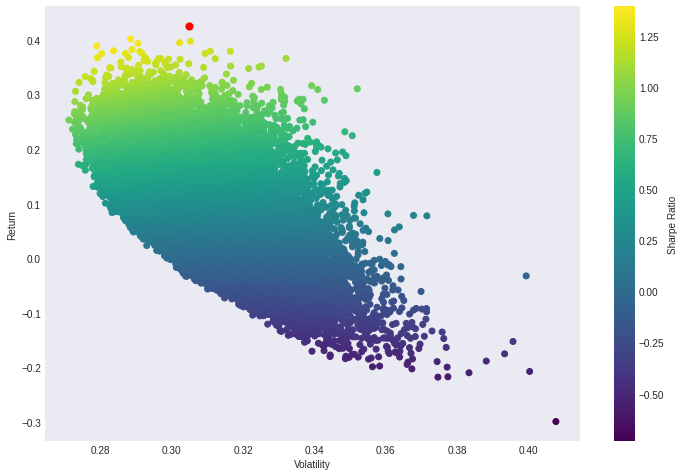

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.scatter(pf_vol, pf_ret, c=pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50)

plt.show()

In [61]:
#Minimum risk Portfolio
max_sr_ret = pf_ret[pf_vol.index(min(pf_vol))]
max_sr_vol = pf_vol[pf_vol.index(min(pf_vol))]

In [62]:
print('Max returns for this portfolio: ', max_sr_ret)
print('Min volatility for this portfolio: ', max_sr_vol)

Max returns for this portfolio:  0.2533179330434745
Min volatility for this portfolio:  0.2712139871817439


In [63]:
print('Its location in the array: ', pf_vol.index(min(pf_vol)))

Its location in the array:  958


In [64]:
print(pf_coin_weight.iloc[958,:])


0    0.147288
1    0.168983
2    0.105002
3    0.437145
4    0.005207
5    0.013921
6    0.122454
Name: 958, dtype: float64


# Here we have calculated weights for min volatility portfolio.
# We can get as many portfolios by this method.

### Another method to optimize portfolio:

In [66]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [73]:
# Taking the whole dataset

In [80]:
df_1y = df1.tail(245)

In [81]:
mu = expected_returns.mean_historical_return(df_1y)#returns.mean() * 252
S = risk_models.sample_cov(df_1y) #Get the sample covariance matrix

In [82]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('Adaniports', 0.0), ('Asianpaints', 0.0), ('Axisbank', 0.0), ('Bajajauto', 0.0), ('Bhartiartl', 0.31764), ('Coalindia', 0.0), ('Drreddy', 0.68236), ('HDFC', 0.0), ('HDFCBank', 0.0), ('Heromotors', 0.0), ('ICICIBank', 0.0), ('INDUSINDBK', 0.0), ('INFY', 0.0), ('ITC', 0.0), ('KOTAKBank', 0.0), ('L&T', 0.0), ('M&M', 0.0), ('Maruti', 0.0), ('NTPC', 0.0), ('ONGC', 0.0), ('Reliance', 0.0), ('SBIN', 0.0), ('Sunpharma', 0.0), ('TATAMotors', 0.0), ('TATAMotors(D)', 0.0), ('TATASteel', 0.0), ('TCS', 0.0), ('Wipro', 0.0), ('YesBank', 0.0)])
Expected annual return: 52.6%
Annual volatility: 29.9%
Sharpe Ratio: 1.69


(0.5258709319054347, 0.2989637660594602, 1.6920810791660392)

In [84]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df_1y)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'Bhartiartl': 5.0, 'Drreddy': 3.0}
Funds remaining: $175.65


So can buy total 5 shares of Bhartiartl and 3 shares of Drreddy and still 175.65 Dollars

From this we can infer that only Bhartiartl, Drreddy is significant. They only give positive returns.

## Now taking the whole data of 5 years

In [75]:
mu = expected_returns.mean_historical_return(df1)#returns.mean() * 252
S = risk_models.sample_cov(df1) #Get the sample covariance matrix

In [76]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('Adaniports', 0.0), ('Asianpaints', 0.26641), ('Axisbank', 0.0), ('Bajajauto', 0.0), ('Bhartiartl', 0.0), ('Coalindia', 0.0), ('Drreddy', 0.0), ('HDFC', 0.10562), ('HDFCBank', 0.05318), ('Heromotors', 0.0), ('ICICIBank', 0.0), ('INDUSINDBK', 0.0), ('INFY', 0.00297), ('ITC', 0.0), ('KOTAKBank', 0.0), ('L&T', 0.0), ('M&M', 0.0), ('Maruti', 0.0), ('NTPC', 0.0), ('ONGC', 0.0), ('Reliance', 0.39784), ('SBIN', 0.0), ('Sunpharma', 0.0), ('TATAMotors', 0.0), ('TATAMotors(D)', 0.0), ('TATASteel', 0.0), ('TCS', 0.17398), ('Wipro', 0.0), ('YesBank', 0.0)])
Expected annual return: 24.4%
Annual volatility: 20.2%
Sharpe Ratio: 1.11


(0.24412239108164416, 0.20172999643250739, 1.1110018095728693)

From this we can infer that only Asianpaints, HDFC, HDFCBank, INFY, Reliance,TCS is significant. They only give positive returns.

> Indented block



In [79]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df1)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'Asianpaints': 2.0, 'HDFC': 1.0, 'HDFCBank': 1.0, 'ONGC': 2.0, 'Reliance': 4.0, 'TCS': 1.0}
Funds remaining: $387.85


### Looks like we have to purchase 2 shares of Asianpaints, 1 share of HDFCBank, 1 share of HDFC, 2 shares of ONGC, 4 shares of Reliance and 1 share of TCS. Still there is 387 dollars remaining